# Gradient Vanishing
Simplified version of [Vanishing Gradients](http://web.stanford.edu/class/cs224n/lectures/vanishing_grad_example.html). No regularize operation and remove redundancy code to introduce gradient vanishing as simple as possible.

(-1, 1)

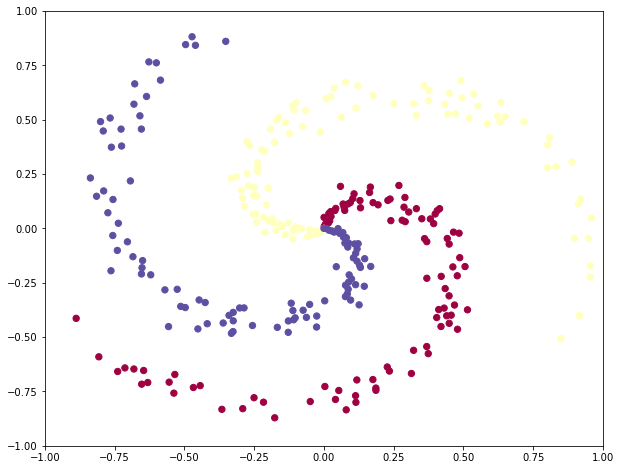

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(0)

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

In [20]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    if len(x) > 1:
        shiftx = x - np.amax(x, axis=1)[:, None]
        exps = np.exp(shiftx)
        x = exps / np.sum(exps, axis=1)[:, None]
    else:
        shiftx = x - np.amax(x)
        exps = np.exp(shiftx)
        x = exps / np.sum(exps)
    return x

def loss(y, y_):
    return - np.sum(np.log(y_[range(y.shape[0]), y])) / y.shape[0]

loss_r = []
for step in range(1):
    w1 = 0.1 * np.random.randn(D, 50)
    b1 = np.zeros((1, 50))
    w2 = 0.1 * np.random.randn(50, 50)
    b2 = np.zeros((1, 50))
    w3 = 0.1 * np.random.randn(50, K)
    b3 = np.zeros((1, K))

    # 3 layers forward network
    h1 = relu(np.dot(X, w1) + b1)
    h2 = relu(np.dot(h1, w2) + b2)
    y_ = softmax(np.dot(h2, w3) + b3)
    
    loss_r.append(loss(y, y_))
    
    # backpropagetion
    grad_a3 = (y_ - y) / y.shape[0]
    grad_w3 = np.dot()